#### Task 1

(a)

In [33]:
import scanpy as sc
import anndata as ad
import numpy as np
from scipy.sparse import csr_matrix
import pandas as pd
import matplotlib.pylab as plt

In [34]:
pip freeze | grep matplotlib

matplotlib==3.1.3
matplotlib-venn==0.11.7


In [35]:
train_data = sc.read_h5ad("/content/drive/MyDrive/MAGISTERKA/SAD2/SAD2022Z_Project1_GEX_train.h5ad")
# print(train_data)
# train_data.obs_names = [f"Cell_{i}" for i in range(train_data.n_obs)]
# train_data.var_names = [f"Gene_{i}" for i in range(train_data.n_vars)]
# print(train_data.obs_names)

In [36]:
test_data = sc.read_h5ad("/content/drive/MyDrive/MAGISTERKA/SAD2/SAD2022Z_Project1_GEX_test.h5ad")
# print(test_data)
# test_data.obs_names = [f"Cell_{i}" for i in range(test_data.n_obs)]
# test_data.var_names = [f"Gene_{i}" for i in range(test_data.n_vars)]
# print(test_data)

In [37]:
print(train_data.n_obs, train_data.n_vars)

72208 5000


In [38]:
print(test_data.n_obs, test_data.n_vars)

18052 5000


(b)

In [39]:
train_norm = train_data.X.toarray()
train_raw = train_data.layers['counts'].toarray()
test_norm = test_data.X.toarray()
test_raw = test_data.layers['counts'].toarray()

In [40]:
train_norm_clipped = np.clip(train_norm, 0, 20)
train_raw_clipped = np.clip(train_raw, 0, 20)
test_norm_clipped = np.clip(test_norm, 0, 20)
test_raw_clipped = np.clip(test_raw, 0, 20)

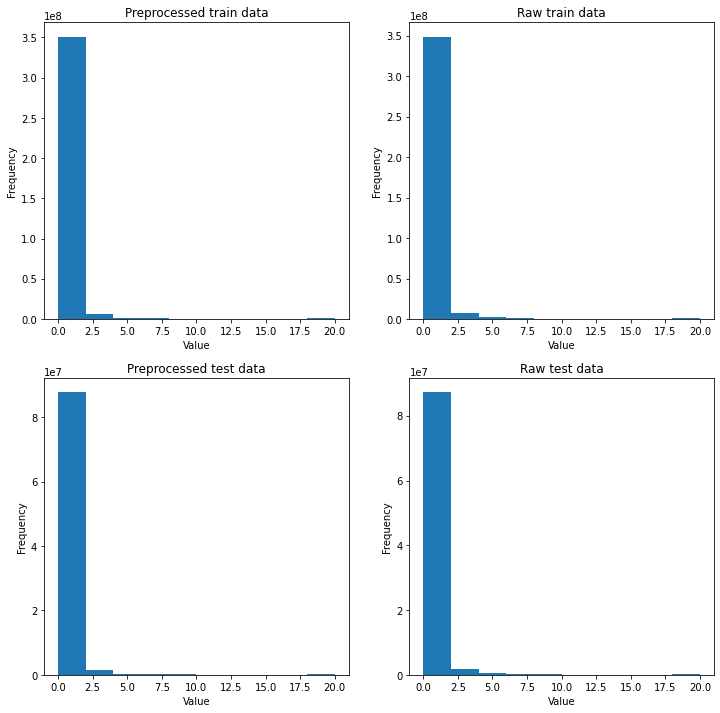

In [41]:
fig, axes = plt.subplots(2, 2, figsize = (12, 12))
label_setter = np.vectorize(lambda ax: [ax.set_xlabel('Value'), 
                                   ax.set_ylabel('Frequency')])
axes[0,0].hist(train_norm_clipped.reshape(-1))
axes[0,0].set_title('Preprocessed train data')
axes[0,1].hist(train_raw_clipped.reshape(-1))
axes[0,1].set_title('Raw train data')
axes[1,0].hist(test_norm_clipped.reshape(-1))
axes[1,0].set_title('Preprocessed test data')
axes[1,1].hist(test_raw_clipped.reshape(-1))
axes[1,1].set_title('Raw test data')

label_setter(axes)

fig.show()

(c)

Has the data beeen normalized to 10k reads? 

In [42]:
train_norm.sum(axis=1)

array([   404.05606,   3829.1133 ,   1648.1301 , ...,   5687.797  ,
       337690.44   ,   1868.8127 ], dtype=float32)

In [43]:
train_raw.sum(axis=1)

array([  554.,  9290.,  1409., ...,  8383., 13320.,  4739.], dtype=float32)

In [44]:
test_norm.sum(axis=1)

array([ 404.05606, 3829.1133 , 1648.1301 , ..., 1747.7454 , 1648.362  ,
       1588.0571 ], dtype=float32)

In [45]:
test_raw.sum(axis = 1)

array([ 554., 9290., 1409., ..., 2625., 1094., 1264.], dtype=float32)

Answer = NO

Has it been log1p transformed?

In [46]:
train_norm

array([[  0.       ,   0.       ,   0.       , ...,   0.       ,
          6.5640874,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
         39.98105  ,   0.       ],
       [  0.       ,   1.1697162,   0.       , ...,   0.       ,
         80.71042  ,   0.       ],
       ...,
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
         34.603085 ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
        101.40853  ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
         62.70125  ,   0.3943475]], dtype=float32)

In [47]:
np.expm1(train_norm)

<ipython-input-47-0cf04bc19829>:1: RuntimeWarning: overflow encountered in expm1
  np.expm1(train_norm)


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        7.0816443e+02, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.3096638e+17, 0.0000000e+00],
       [0.0000000e+00, 2.2210784e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.1274297e+35, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0664210e+15, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
                  inf, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.7013987e+27, 4.8341593e-01]], dtype=float32)

In [48]:
train_raw

array([[  0.,   0.,   0., ...,   0.,   9.,   0.],
       [  0.,   0.,   0., ...,   0.,  97.,   0.],
       [  0.,   1.,   0., ...,   0.,  69.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,  51.,   0.],
       [  0.,   0.,   0., ...,   0.,   4.,   0.],
       [  0.,   0.,   0., ...,   0., 159.,   1.]], dtype=float32)

Answer = NO

(d)

In [49]:
train_norm = train_norm[train_norm!=0]
train_raw = train_raw[train_raw!=0]
test_norm = test_norm[test_norm!=0]
test_raw = test_raw[test_raw!=0]

In [50]:
train_norm_clipped = np.clip(train_norm, 0, 20)
train_raw_clipped = np.clip(train_raw, 0, 20)
test_norm_clipped = np.clip(test_norm, 0, 20)
test_raw_clipped = np.clip(test_raw, 0, 20)

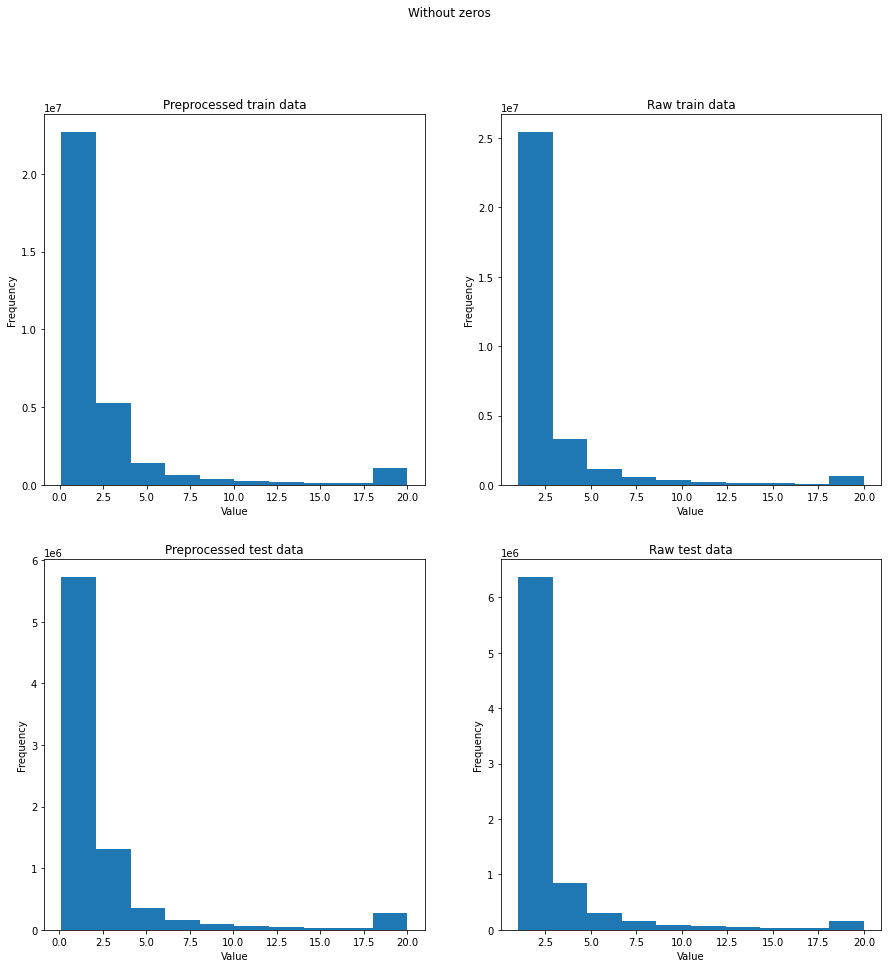

In [51]:
fig, axes = plt.subplots(2, 2, figsize = (15, 15))
label_setter = np.vectorize(lambda ax: [ax.set_xlabel('Value'), 
                                   ax.set_ylabel('Frequency')])
axes[0,0].hist(train_norm_clipped)
axes[0,0].set_title('Preprocessed train data')
axes[0,1].hist(train_raw_clipped)
axes[0,1].set_title('Raw train data')
axes[1,0].hist(test_norm_clipped)
axes[1,0].set_title('Preprocessed test data')
axes[1,1].hist(test_raw_clipped)
axes[1,1].set_title('Raw test data')


label_setter(axes)
fig.suptitle("Without zeros")
fig.show()

(e)

The distribution of data remind of exponential distribution. I assume that the distribution of the data is right-skewed because the data is the data of gene expression mostly from cells of the immune system. As it's more common to be healthy rather that sick (so it's more probable that grater amount of human donors from who the dataset was collected have been healthy) thus most of the genes in our dataset involved in defendence of organism have (not suprisingly) small expression. What's more to extract more valuable information from dataset it's important to remove zero values as because of the same reason I mentioned above there are a lot of them and they make it more difficult to analyse genes with actual expression which are the ones we're probably more interested in. (Zero values noise the information about the actual expression.)

(f)

In [52]:
train_data.obs

,GEX_n_genes_by_counts,GEX_pct_counts_mt,GEX_size_factors,GEX_phase,ADT_n_antibodies_by_counts,ADT_total_counts,ADT_iso_count,cell_type,batch,ADT_pseudotime_order,...,DonorID,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker,is_train
AGTTCCCAGCACCTGC-1-s3d1,948,5.113025,1.371097,G2M,139,2278.0,23.0,CD14+ Mono,s3d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
CAGATTGCAAAGGCAC-1-s2d1,2323,4.077203,2.426149,S,91,1190.0,2.0,Erythroblast,s2d1,0.965441,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
GTCATGACAATTTCCT-1-s1d2,1952,7.838442,0.854908,G2M,123,4138.0,14.0,Naive CD20+ B IGKC+,s1d2,NaN,...,10886,35,28.6,B+,Asian,NOT HISPANIC OR LATINO,Female,True,Nonsmoker,train
TCATCCGCACTTGGCG-1-s2d5,1811,7.071157,1.387475,G2M,105,707.0,2.0,CD14+ Mono,s2d5,NaN,...,16710,40,27.8,O+,White,HISPANIC OR LATINO,Female,False,Smoker,iid_holdout
AGTGCCGGTCATCAGT-1-s2d5,796,4.107981,0.520903,S,96,945.0,4.0,NK,s2d5,NaN,...,16710,40,27.8,O+,White,HISPANIC OR LATINO,Female,False,Smoker,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGTCATGAGGTTTACC-1-s3d7,1108,9.544659,0.616979,G2M,114,1140.0,7.0,CD14+ Mono,s3d7,NaN,...,11466,22,31.5,A+,Asian,NOT HISPANIC OR LATINO,Female,True,Nonsmoker,train
GTGAGCCTCGCAGATT-1-s2d1,2821,9.352348,3.336449,S,90,474.0,5.0,Lymph prog,s2d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
GTCATTTTCCATTGCC-1-s2d1,1810,2.792384,1.473857,S,95,1327.0,1.0,Erythroblast,s2d1,0.977025,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
CGCATGGAGAACCCGA-1-s1d1,434,0.239860,0.039444,G2M,131,6829.0,9.0,Reticulocyte,s1d1,0.726435,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train


In [53]:
test_data.obs

,GEX_n_genes_by_counts,GEX_pct_counts_mt,GEX_size_factors,GEX_phase,ADT_n_antibodies_by_counts,ADT_total_counts,ADT_iso_count,cell_type,batch,ADT_pseudotime_order,...,DonorID,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker,is_train
AGTTCCCAGCACCTGC-1-s3d1,948,5.113025,1.371097,G2M,139,2278.0,23.0,CD14+ Mono,s3d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
CAGATTGCAAAGGCAC-1-s2d1,2323,4.077203,2.426149,S,91,1190.0,2.0,Erythroblast,s2d1,0.965441,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
GTCATGACAATTTCCT-1-s1d2,1952,7.838442,0.854908,G2M,123,4138.0,14.0,Naive CD20+ B IGKC+,s1d2,NaN,...,10886,35,28.6,B+,Asian,NOT HISPANIC OR LATINO,Female,True,Nonsmoker,train
TCATCCGCACTTGGCG-1-s2d5,1811,7.071157,1.387475,G2M,105,707.0,2.0,CD14+ Mono,s2d5,NaN,...,16710,40,27.8,O+,White,HISPANIC OR LATINO,Female,False,Smoker,iid_holdout
AGTGCCGGTCATCAGT-1-s2d5,796,4.107981,0.520903,S,96,945.0,4.0,NK,s2d5,NaN,...,16710,40,27.8,O+,White,HISPANIC OR LATINO,Female,False,Smoker,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAGATCGCAATTCTCT-1-s3d7,1060,19.200811,0.517091,G2M,109,734.0,7.0,CD16+ Mono,s3d7,NaN,...,11466,22,31.5,A+,Asian,NOT HISPANIC OR LATINO,Female,True,Nonsmoker,train
CTGCAGGCACTACACA-1-s3d6,1594,8.558002,1.054544,S,112,453.0,7.0,G/M prog,s3d6,NaN,...,28045,36,23.8,A+,Other Race,HISPANIC OR LATINO,Female,False,Nonsmoker,train
GTGAGTTGTCCAGTTA-1-s2d4,2723,9.221835,1.501935,G2M,104,371.0,4.0,CD14+ Mono,s2d4,NaN,...,12710,27,32.1,O+,White,NOT HISPANIC OR LATINO,Male,False,Nonsmoker,train
ATGAGGGCAGACCGCT-1-s4d1,1527,4.393116,0.663689,G1,131,3508.0,28.0,CD4+ T naive,s4d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,test


The data contained in data frame adata.obs is a detailed information of each observation (for example in our case information such as cell type or BMI of a donor)

In [54]:
obs = pd.concat([train_data.obs, test_data.obs])

In [55]:
print("Number of patients: ", len(obs['DonorID'].drop_duplicates()), 
      '\n', 
      "Number of labs: ", len(obs['Site'].drop_duplicates()), 
      '\n', 
      "Number of cell types: ", len(obs['cell_type'].drop_duplicates()))

Number of patients:  9 
 Number of labs:  4 
 Number of cell types:  45
